In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings

warnings.filterwarnings("ignore")

Data Preparation and Loading

In [47]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = ["ID", "Diagnosis", "Mean Radius", "Mean Texture", "Mean Perimeter", "Mean Area",
                "Mean Smoothness", "Mean Compactness", "Mean Concavity", "Mean Concave Points",
                "Mean Symmetry", "Mean Fractal Dimension", "SE Radius", "SE Texture", "SE Perimeter",
                "SE Area", "SE Smoothness", "SE Compactness", "SE Concavity", "SE Concave Points",
                "SE Symmetry", "SE Fractal Dimension", "Worst Radius", "Worst Texture",
                "Worst Perimeter", "Worst Area", "Worst Smoothness", "Worst Compactness",
                "Worst Concavity", "Worst Concave Points", "Worst Symmetry", "Worst Fractal Dimension"]
data = pd.read_csv(url, names=column_names)

DATA *WRANGALING*

In [48]:


data.drop("ID", axis=1, inplace=True)
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

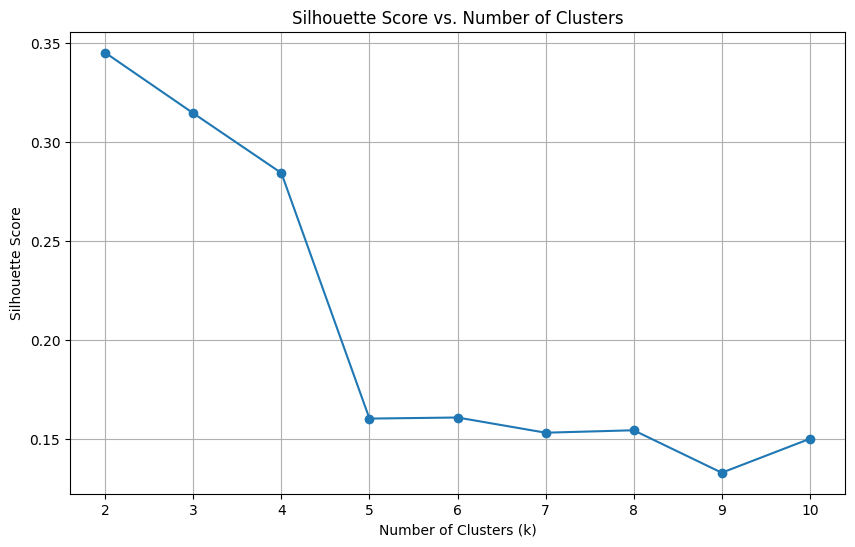

         Diagnosis  Mean Radius  Mean Texture  Mean Perimeter    Mean Area  \
Cluster                                                                      
0         0.069364    12.370971     18.169335       79.382052   481.024855   
1         1.000000    21.378000     22.403143      144.185714  1442.937143   
2         1.000000    18.596105     21.453684      121.899895  1086.764211   
3         0.623656    13.367882     20.075376       88.572043   563.998925   

         Mean Smoothness  Mean Compactness  Mean Concavity  \
Cluster                                                      
0               0.091263          0.073436        0.039328   
1               0.109356          0.211546        0.265866   
2               0.098005          0.121700        0.141021   
3               0.108755          0.161243        0.152873   

         Mean Concave Points  Mean Symmetry  ...  Worst Radius  Worst Texture  \
Cluster                                      ...                             

In [49]:
#kMeans Clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop('Diagnosis', axis=1))
k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters")
plt.grid(True)
plt.show()



chosen_k = 4
kmeans = KMeans(n_clusters=chosen_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

cluster_means = data.groupby('Cluster').mean()
print(cluster_means)


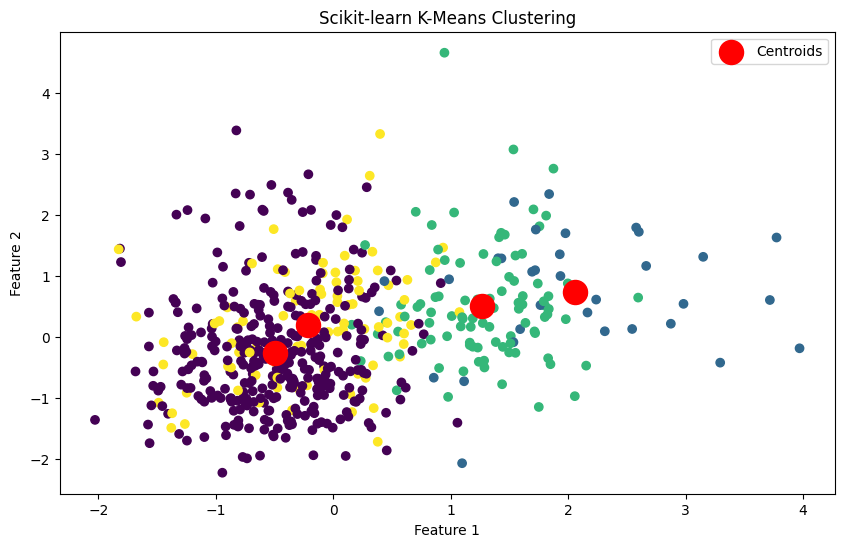

In [50]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


kmeans = KMeans(n_clusters=chosen_k, random_state=42)
data['Cluster_sklearn'] = kmeans.fit_predict(data_scaled)


plt.figure(figsize=(10, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=data['Cluster_sklearn'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scikit-learn K-Means Clustering")
plt.legend()
plt.show()

In [51]:
import numpy as np
import tensorflow as tf

num_points = 100
dimensions = 2
points = np.random.uniform(0, 1000, [num_points, dimensions])

def input_fn():
  return tf.compat.v1.train.limit_epochs(
      tf.convert_to_tensor(points, dtype=tf.float32), num_epochs=1)

num_clusters = 5
kmeans = tf.compat.v1.estimator.experimental.KMeans(
    num_clusters=num_clusters, use_mini_batch=False)

In [52]:
#train
num_iterations = 10
previous_centers = None
scores = []

for _ in range(num_iterations):
  kmeans.train(input_fn)
  cluster_centers = kmeans.cluster_centers()
  if previous_centers is not None:
    print('delta:', cluster_centers - previous_centers)
  previous_centers = cluster_centers
  score = kmeans.score(input_fn)
  scores.append(score)
  print('score:', score)
print('cluster centers:', cluster_centers)


cluster_indices = list(kmeans.predict_cluster_index(input_fn))
for i, point in enumerate(points):
  cluster_index = cluster_indices[i]
  center = cluster_centers[cluster_index]
  print('point:', point, 'is in cluster', cluster_index, 'centered at', center)

score: 7732911.0
delta: [[ -43.30493  -279.7918  ]
 [-139.01593   -88.127625]
 [ 137.04526    88.19721 ]
 [ -68.211395   42.232178]
 [ 162.83737   -17.773926]]
score: 4695840.5
delta: [[ -4.797058  -95.227356 ]
 [-19.983093    3.2649536]
 [ 11.749451    8.038879 ]
 [  1.7857361 -21.022644 ]
 [ 22.171783  -31.31897  ]]
score: 4389118.0
delta: [[ -14.216797  -139.10754  ]
 [   9.044312   -18.240295 ]
 [ -47.468414    -7.2232513]
 [  18.457932    -3.9954834]
 [  35.95691    -29.246216 ]]
score: 3653353.0
delta: [[ -3.4657593 -91.67398  ]
 [  7.607361  -11.935242 ]
 [-75.04379    -0.8556366]
 [ 11.731567   17.875305 ]
 [ 20.804749  -43.490875 ]]
score: 3205173.0
delta: [[-13.235168   -28.408875  ]
 [  0.           0.        ]
 [-43.555817     0.42190552]
 [  9.503571    11.293091  ]
 [ 15.186401   -38.916718  ]]
score: 3047212.2
delta: [[ -6.1185303 -44.636337 ]
 [ 33.311035  -35.186768 ]
 [-17.988922   -5.917221 ]
 [  5.7380524  10.585632 ]
 [  5.6884766 -28.228485 ]]
score: 2924198.8
del

score: 2902854.0
cluster centers: [[837.6163  241.03008]
 [761.2365  831.6064 ]
 [325.37585 204.20209]
 [213.98846 709.02454]
 [601.8982  431.048  ]]
point: [332.45964349 187.39536052] is in cluster 2 centered at [325.37585 204.20209]
point: [387.19285561 378.78920888] is in cluster 2 centered at [325.37585 204.20209]
point: [ 33.90937902 921.70840181] is in cluster 3 centered at [213.98846 709.02454]
point: [396.29834883 650.52047135] is in cluster 3 centered at [213.98846 709.02454]
point: [686.09829114 899.53833496] is in cluster 1 centered at [761.2365 831.6064]
point: [164.27043073 237.7734884 ] is in cluster 2 centered at [325.37585 204.20209]
point: [660.35057655 366.32775084] is in cluster 4 centered at [601.8982 431.048 ]
point: [338.42350981 164.91186966] is in cluster 2 centered at [325.37585 204.20209]
point: [833.32617871 245.80060594] is in cluster 0 centered at [837.6163  241.03008]
point: [140.85956661 520.22982771] is in cluster 3 centered at [213.98846 709.02454]
poin

In [53]:
kmeans.cluster_centers()

array([[837.6163 , 241.03008],
       [761.2365 , 831.6064 ],
       [325.37585, 204.20209],
       [213.98846, 709.02454],
       [601.8982 , 431.048  ]], dtype=float32)

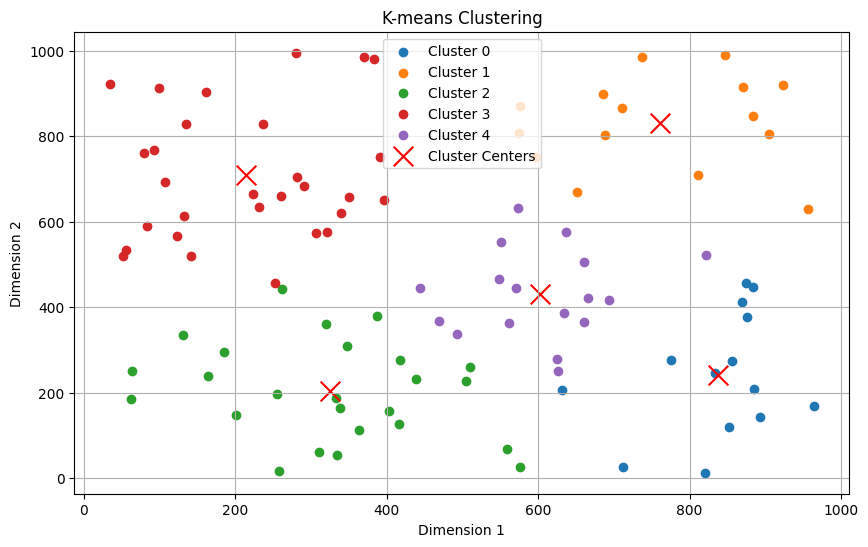

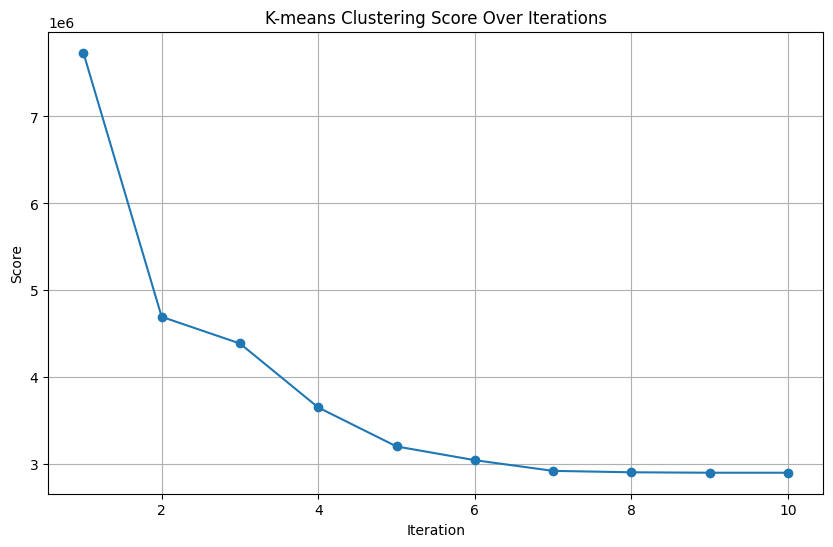

In [54]:

cluster_indices = list(kmeans.predict_cluster_index(input_fn))


plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    cluster_points = np.array([points[j] for j in range(len(points)) if cluster_indices[j] == i])
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=200, label='Cluster Centers')
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("K-means Clustering")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(range(1, num_iterations + 1), scores, marker='o')
plt.xlabel("Iteration")
plt.ylabel("Score")
plt.title("K-means Clustering Score Over Iterations")
plt.grid(True)
plt.show()

BUSINESS OBJECTIVE:-
The clusters obtained from K-means clustering can be used to address various business problems related to breast cancer diagnosis and treatment. For example, clusters may help in identifying distinct groups of patients with different cancer characteristics, which can inform treatment strategies.

Results:-
The K-means clustering analysis on the breast cancer dataset revealed distinct groups of tumors based on their characteristics. Cluster centers represent typical feature profiles within each group. This clustering can aid in early diagnosis and treatment decision-making by identifying clusters with a higher likelihood of malignancy. Further analysis and validation are recommended to refine these insights for clinical use.

